In [8]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import torch
print(os.getpid())

35484


In [2]:
# ChromAn related imports
sys.path.append(r'C:\Softwares\Github\MerScope01') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

# Option 1: quickly visualize one field of view 

In [16]:
image_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230630-4T1cell_methanol\H3M4'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230630-4T1cell_methanol\H0M1'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
#print(image_basenames)

\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230630-4T1cell_methanol\H3M4


In [ ]:
sel_fov_id = 0

In [17]:
image_filename = os.path.join(image_folder, image_basenames[sel_fov_id])
print(image_filename)
# load image
daxp = dax_process.DaxProcesser(
    image_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50' )
daxp._load_image()
# corrections
daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230630-4T1cell_methanol\H3M4\Conv_zscan_000.dax
Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230630-4T1cell_methanol\H3M4\Conv_zscan_000.dax
- New save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230630-4T1cell_methanol\H3M4\Conv_zscan_000_processed.hdf5
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  30 2048 2048]
- Loaded images for channels:['750', '647', '561', '488'] in 3.425s.
- Correct illumination for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for corr_illumination.
- Start illumination correction for channels:['750', '647', '561', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- corre

<IPython.core.display.Javascript object>


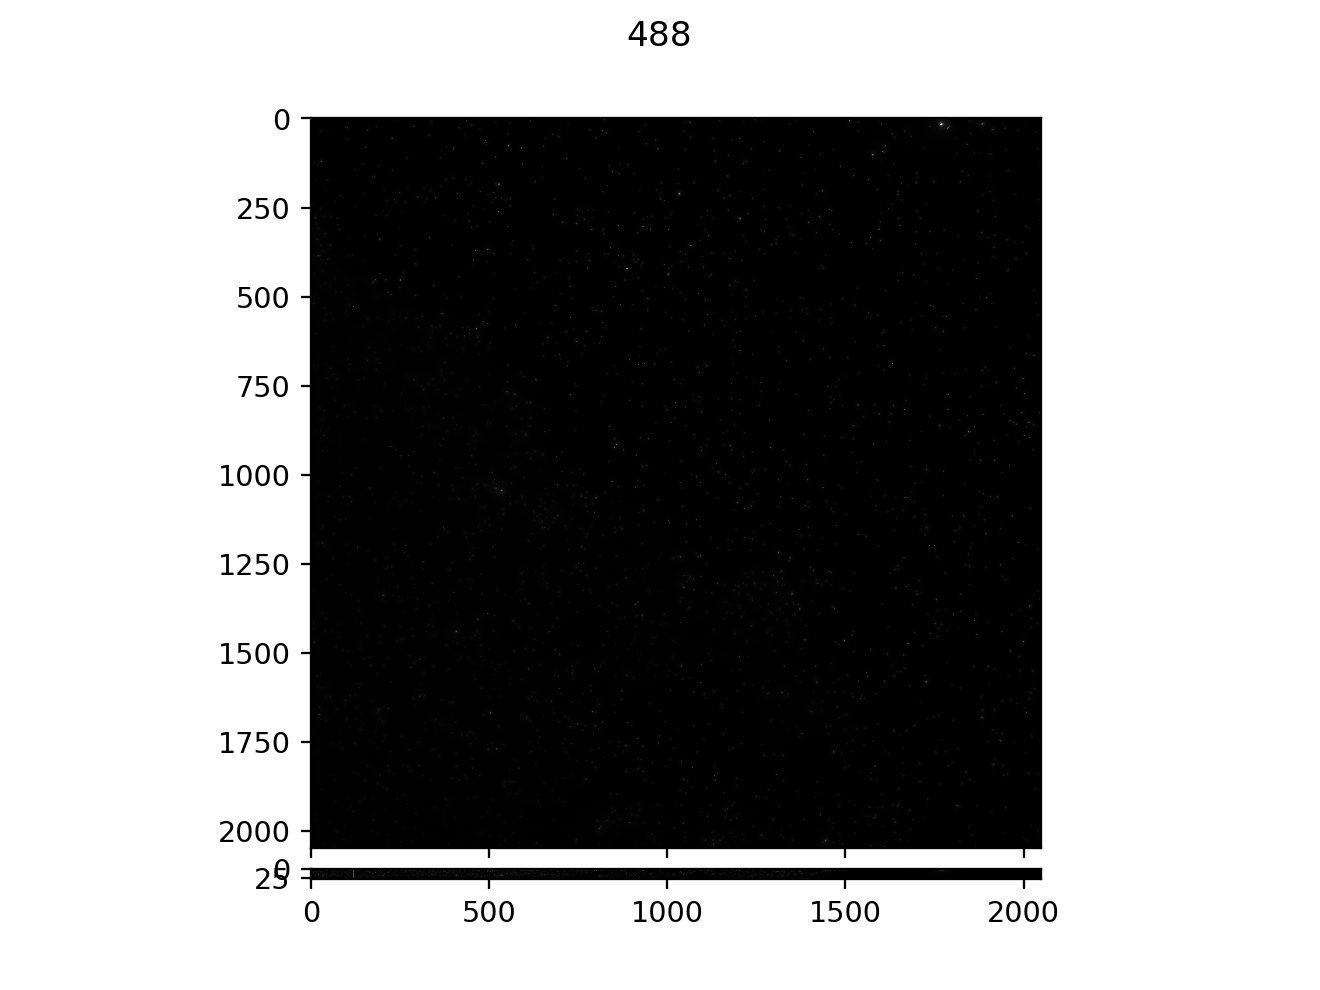

In [19]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[2000,20000],
    )